# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [27]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

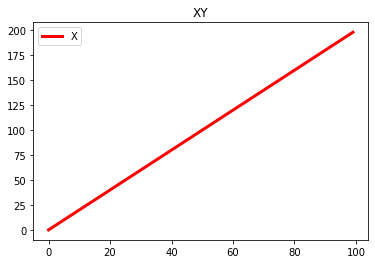

In [4]:
# Method 1
plt.plot(x,y, color='red', linewidth=3)
plt.title('XY')
plt.legend(['X', 'Y'])
plt.show()

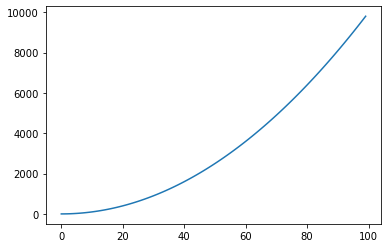

In [5]:
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

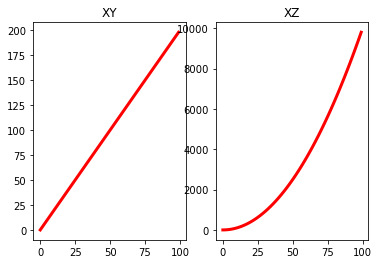

In [6]:
# Method 2

x = np.arange(0,100)
y = x*2
z = x**2

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2) 
ax1.plot(x,y, color='red', linewidth=3)
ax1.set_title('XY')   


ax2.plot(x,z, color='red', linewidth=3)
ax2.set_title('XZ')   


plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

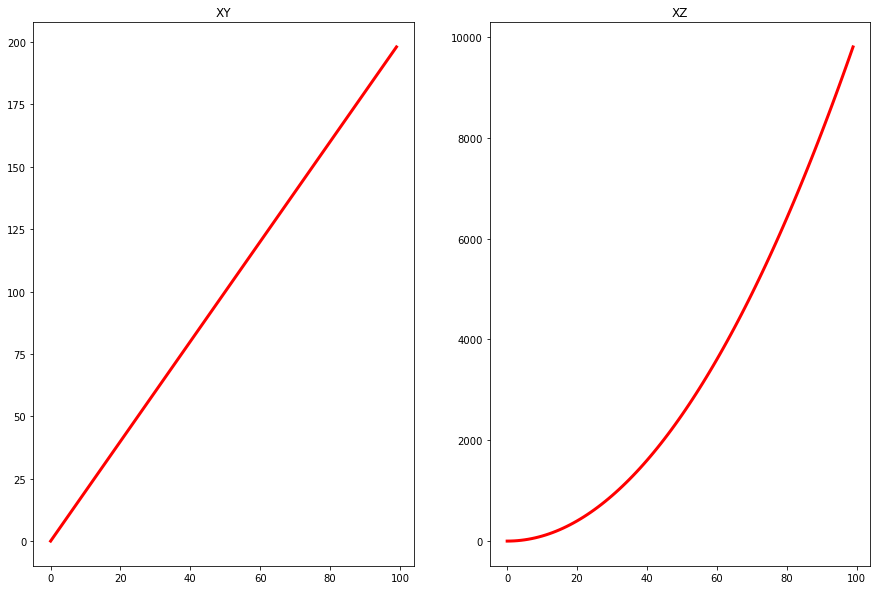

In [7]:
# your code here



x = np.arange(0,100)
y = x*2
z = x**2

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,10)) 
ax1.plot(x,y, color='red', linewidth=3)
ax1.set_title('XY')   


ax2.plot(x,z, color='red', linewidth=3)
ax2.set_title('XZ')   


plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

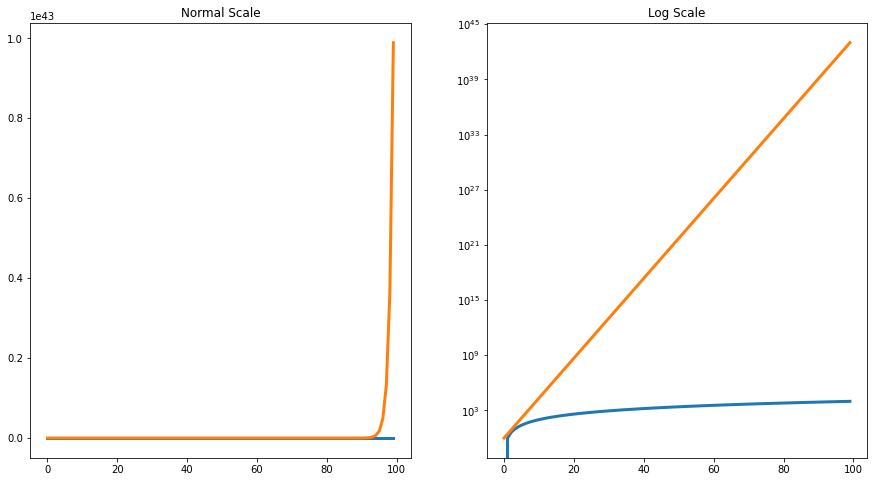

In [10]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(x, x**2, x, np.exp(x), linewidth=3)

axes[0].set_title("Normal Scale")


axes[1].plot(x, x**2, x, np.exp(x), linewidth=3)

axes[1].set_yscale("log")
axes[1].set_title("Log Scale");


#### As a bonus challenge, try to add a legend to the plot.

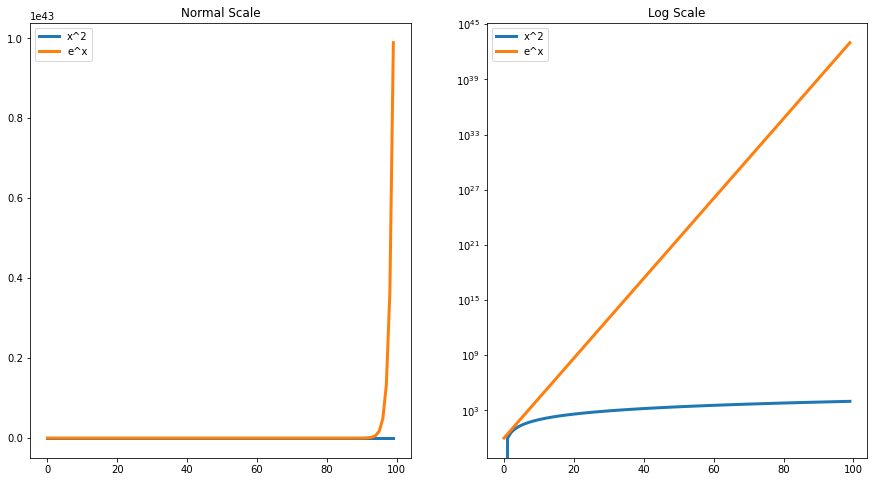

In [11]:
# your code here

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(x, x**2, x, np.exp(x), linewidth=3)
axes[0].set_title("Normal Scale")

axes[0].legend(["x^2", "e^x"])

axes[1].plot(x, x**2, x, np.exp(x), linewidth=3)

axes[1].set_yscale("log")
axes[1].set_title("Log Scale")

axes[1].legend(["x^2", "e^x"]);

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [12]:
# your code here

fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

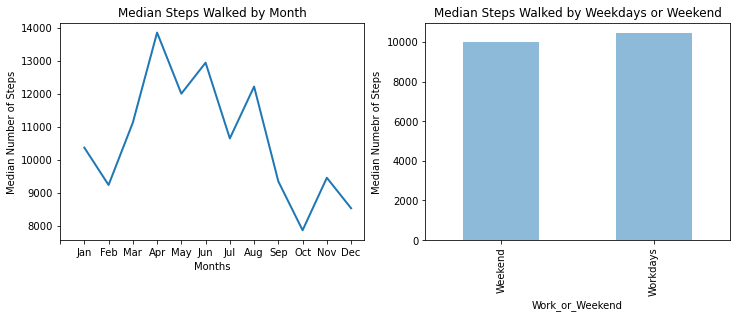

In [14]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_steps_month = fitbit["Steps"].groupby(fitbit["Months_encoded"]).median()

## Matplotlib object-oriented API
## Create figure and axes
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

plt.sca(axes[0])

## This is Pandas plot. Beckend is Matplotlib

median_steps_month.plot.line(linewidth=2)

## Set axis labels
plt.xlabel("Months")
plt.ylabel("Median Number of Steps")

## Set figure title
plt.title("Median Steps Walked by Month")

## Rewrite ticks for x axis
plt.xticks(list(range(13)),['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


## Save figure locally
plt.savefig("median_steps_month.png", bbox_inches="tight")


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.sca(axes[1])

median_steps_week = fitbit["Steps"].groupby(fitbit["Work_or_Weekend"]).median().sort_values()

## Plot bar chart
median_steps_week.plot.bar(alpha=0.5)

## Set axes labels
plt.ylabel("Median Numebr of Steps")
## Change tick for x axis
plt.xticks(list(range(2)),['Weekend','Workdays'])
## Set plotl title
plt.title("Median Steps Walked by Weekdays or Weekend")



## Save figure locally
plt.savefig("median_steps_week.png", bbox_inches="tight")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

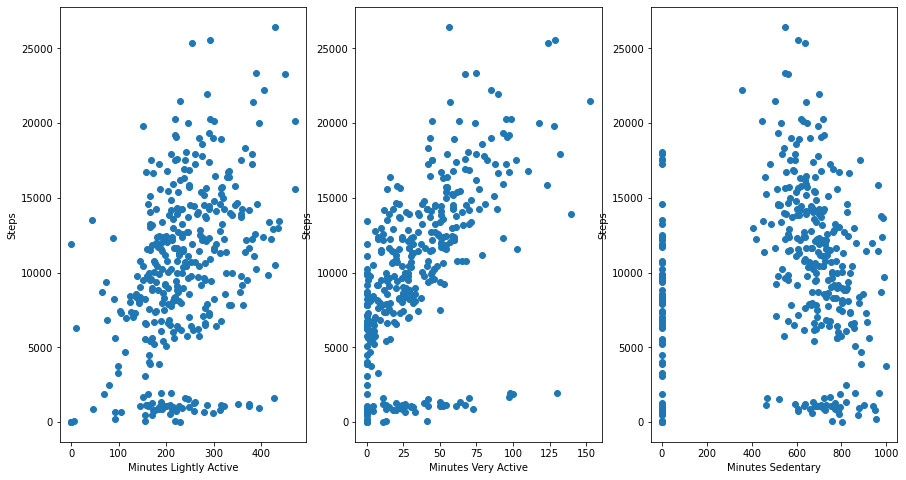

In [16]:
# your code here

## Prepare data for plotting
data = fitbit[["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary", "Steps"]]

## Create figure and axis
fig, axes = plt.subplots(figsize=(15, 8), nrows=1, ncols=3)

## Iterate over data and plot scatter plot
for i in range(3):
    ## Sets current axes to be i
    plt.sca(axes[i])
    
    ## Scatter plot
    plt.scatter(data.iloc[:, i], data["Steps"])
    
    ## Set axes names
    plt.xlabel(data.iloc[:, i].name)
    
    plt.ylabel("Steps")
    

In [17]:
data.iloc[:, 1].name

'Minutes Very Active'

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [18]:
# your code here

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [19]:
# your code here#

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=[int, float]).head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [21]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=object).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [22]:
# your code here

plt.style.use("classic")

# sns.set_style("dark")

plt.rcParams["figure.figsize"] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

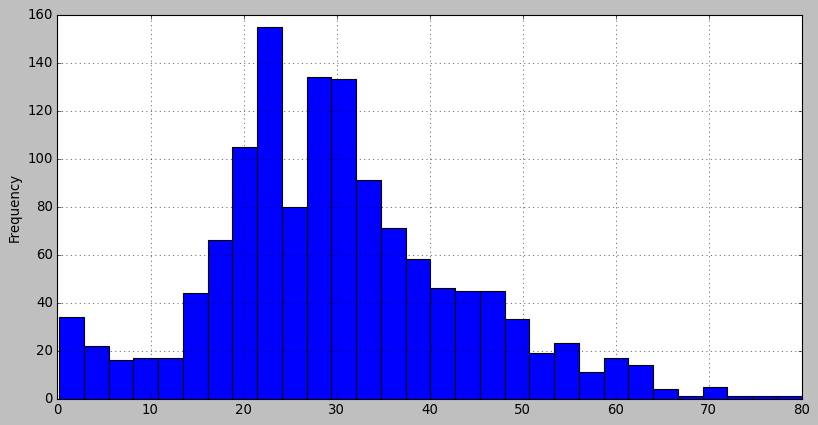

In [23]:
# your code here


titanic["Age"].plot.hist(bins=30)

plt.grid()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

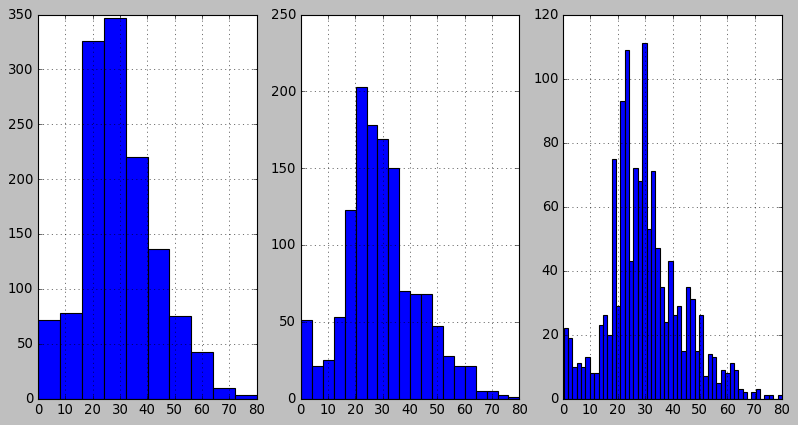

In [24]:
# your code here

plt.subplot(1,3,1)
titanic['Age'].hist(bins=10)

plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)

plt.subplot(1,3,3)
titanic['Age'].hist(bins=50);

#### How does the bin size affect your plot?

In [ ]:

#Increasing the bin size partitions data more granularly so we see more observations, so is mor accurate.
#Smaller bin size aggregates observetions into bigger bins and may hinder to see the tails of the distribution


#### Use seaborn to show the distribution of column `Age`.

In [31]:
# your code here

sns.displot(titanic['Age'], bins=30, color="blue", kde=False);

AttributeError: module 'seaborn' has no attribute 'displot'

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

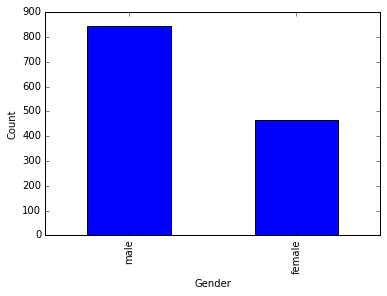

In [28]:
# Method 1 - matplotlib
# your code here

titanic["Gender"].value_counts().plot.bar()

plt.xlabel("Gender")
plt.ylabel("Count");

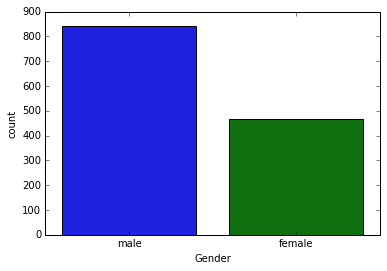

In [29]:
# Method 2 - seaborn
# your code here

sns.countplot(x="Gender", data=titanic);

#### Use the right plot to visualize the column `Pclass`.

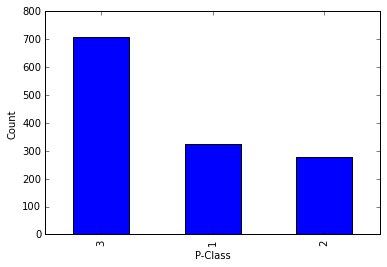

In [30]:
# your code here

titanic["Pclass"].value_counts().plot.bar()

plt.xlabel("P-Class")
plt.ylabel("Count");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [32]:
# your code here

titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

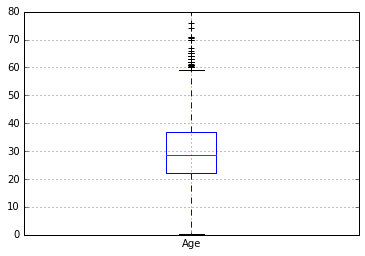

In [33]:
titanic.boxplot(column="Age");

In [ ]:
"""
IQR = Q3 - Q1 - this is the length of the vertical line on the box plot
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The last plot is a boxplot of feature Age. It shows summary of feature Age such as, min value, lower quartile,
meadina, upper quartile, inter-quartile range, and max value. Moreover, boxplot shows that we have some outliers
in feature Age. Furthermore, by visual inspection, as the whiskers have same length we can conclude that feature
Age is distributed Normally.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

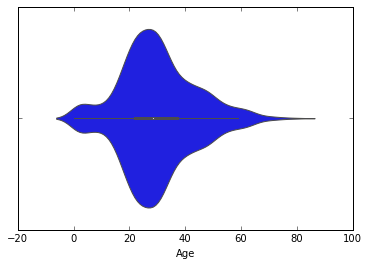

In [34]:
# your code here

sns.violinplot(x="Age", data=titanic);


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

The violin plot shows same characteristics as the boxplot. However, compared to boxplot it explicitly show the
distribution of the feature.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

#Can't find this

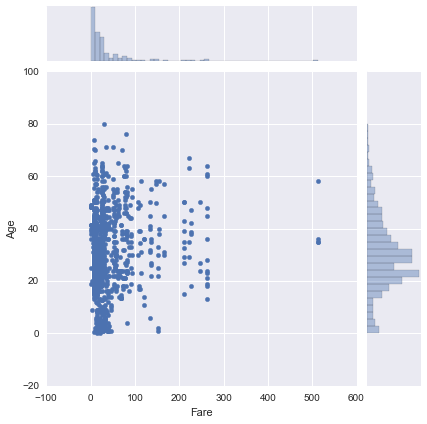

In [35]:
# Method 2 - seaborn
# your code here

plt.style.use("seaborn")

sns.jointplot(x="Fare", y="Age", data=titanic);

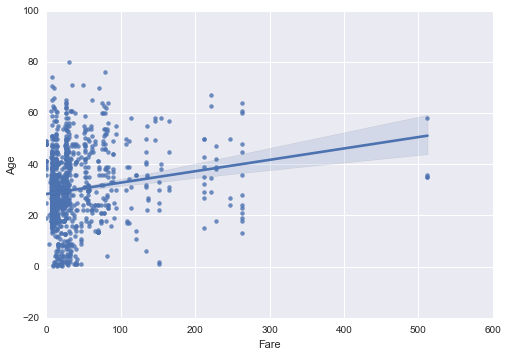

In [37]:

plt.style.use("seaborn")

sns.regplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

In [38]:
# your code here


titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


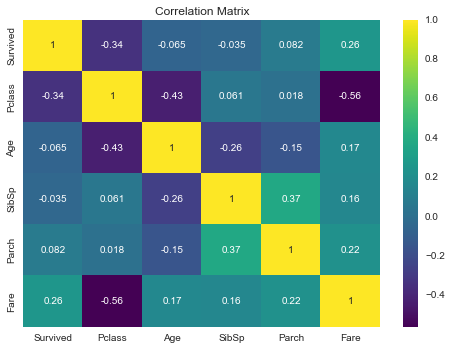

In [39]:
sns.heatmap(titanic.iloc[:, 1:].corr(), cmap="viridis", annot=True)

plt.title("Correlation Matrix");

#### What are the most correlated features?

In [ ]:
"""
your comments here


The most correlated features are features which have higher positive value in this matrix.
These features are: Parch-SibSp, Fare-Survived, Fare-Age, Parch-Fare

Not considering Passenger ID column in corr matrix or dummy/categorical variables as correlation foesn't make sense with these
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

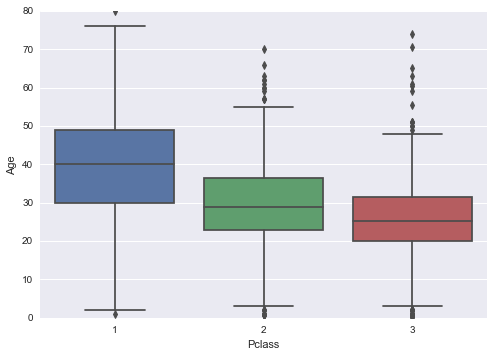

In [40]:
# your code here

sns.boxplot(x="Pclass", y="Age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

TypeError: distplot() got an unexpected keyword argument 'x'

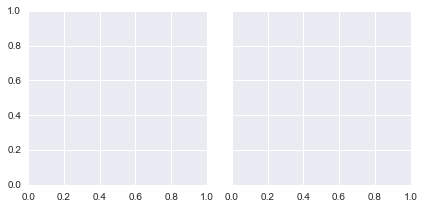

In [42]:
# your code here


g = sns.FacetGrid(col="Gender", data=titanic)

g.map_dataframe(sns.distplot, x="Age", binwidth=3);